# 📈 Prédire la valeur de l’action Google dans le futur

**Contexte :** <blockquote> Vous êtes datascientist chez Google en charge d'un nouveau projet autour de TimeSeries. Votre premier projet consiste à proposer une solution permettant de prédire la tendance de l'action Google dans le futur et de former une nouvelle équipe de datascientists (juniors) sur les RNN et en particulier les LSTM.

    
Pour réaliser ce projet, vous avez accés à deux datasets :
* Dataset Train : 5 années d’historique de l’action google 2012 - 2016
* Dataset Test : un mois de données Janvier 2017

Développer une solution basée sur les réseaux de neurones récurrents de type LSTM et permettant de prédire l'action Google dans le futur</blockquote> 

# 👩🏻‍💻 Exploration des données

## Imports

🔎 Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

🔎 Import Dataset

In [2]:
df = pd.read_csv('C:/Users/zaome/Documents/Week_formation/Projet_TimeSerie/Google_Stock_Price_Train.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#df = pd.read_csv?
#df

## Informations des données

In [4]:
df.shape

(1258, 5)

🔎 Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


🔎 Data Descriptive

In [6]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


🔎 Types de données

In [7]:
df.dtypes.value_counts()

float64    3
object     2
dtype: int64

In [8]:
df.dtypes

Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

🔎 Valeurs manquantes

In [9]:
df.isnull().sum().sort_values()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

🔎 Duplicates

In [10]:
df.duplicated().sum()

0

# 🎨 Visualisations

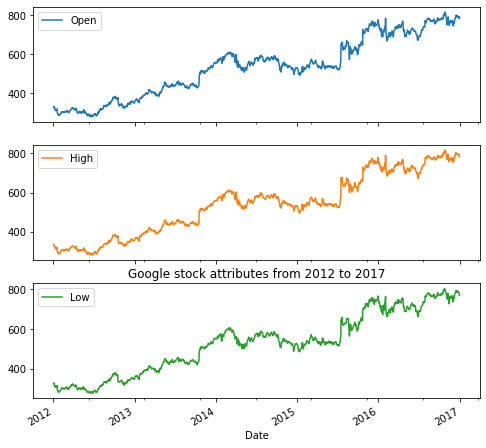

In [11]:
df.plot(subplots=True, figsize=(8,8))
plt.title('Google stock attributes from 2012 to 2017')
plt.show()

# 🌌Preprocessing

## Import librairies

In [12]:
#Preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Modèle
from keras.models import Sequential
from tensorflow.keras.layers import  LSTM, Dense, Dropout
from tensorflow.keras.metrics import Accuracy

## Normalisation

In [13]:
training_set = df.drop(['High', 'Low', 'Open', 'Volume'], axis = 1)

In [14]:
training_set['Close'] = training_set['Close'].str.replace(',', '')

In [15]:
training_set

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


In [16]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

Afin d’obtenir toutes ces valeurs entre la plage de 0 à 1, nous utiliserons le MinMaxScaler. La valeur minimale serait 0 et la valeur maximale serait 1. La mise à l’échelle raccourcit le temps d’exécution, tout en réduisant l’erreur.

## Standardisation et Echantillonnage

Nous allons entraîner ce modèle dans des données de 60 jours à la fois.

In [17]:
X_train=[]
y_train=[]
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
training_set_scaled.shape

(1258, 1)

Nous stockons les données x_train et y_train dans 2 tableaux numériques différents.

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_train.shape

(1198, 60, 1)

In [21]:
y_train.shape

(1198,)

# 🔢 Modèles LSTM

## Couches

4 techniques pour éviter l'overfiting :
* Early stopping
* Regularisation
* Data augmentation (CNN)
* Simplifier l'architecture du réseau

In [22]:
regressor = Sequential()

* La **return_sequences** est définie sur True, afin de renvoyer la séquence complète dans la sortie. 
* Pour une seule couche, les dimensions seraient de 60 par 5. Chaque ligne a une forme de 60 par 5 pour la longueur du jeu de données d’apprentissage.
* Rajouter le **Dropout** si ça Overfit : il désactive aléatoirement un pourcentage de couche

In [23]:
regressor.add(LSTM(units=60,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

In [24]:
regressor.add(LSTM(units=60,return_sequences=True))
regressor.add(Dropout(0.6))

In [25]:
regressor.add(LSTM(units=80,return_sequences=True))
regressor.add(Dropout(0.6))

In [26]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [27]:
regressor.add(Dense(units = 1))

## Modèle

Le **batch_size** indique le nombre d’échantillons d’entraînement utilisés pour chaque itération via le réseau neuronal.

Compile

In [28]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

Fit

In [29]:
validation_split = 0.2
history = regressor.fit(X_train, y_train, validation_split = validation_split, epochs=40, batch_size=32)

Epoch 1/40
30/30 [==============================] - 19s 301ms/step - loss: 0.0317 - val_loss: 0.0013
Epoch 2/40
30/30 [==============================] - 6s 214ms/step - loss: 0.0149 - val_loss: 0.0011
Epoch 3/40
30/30 [==============================] - 9s 316ms/step - loss: 0.0114 - val_loss: 9.7282e-04
Epoch 4/40
30/30 [==============================] - 9s 286ms/step - loss: 0.0126 - val_loss: 0.0026
Epoch 5/40
30/30 [==============================] - 9s 290ms/step - loss: 0.0102 - val_loss: 8.7640e-04
Epoch 6/40
30/30 [==============================] - 10s 334ms/step - loss: 0.0100 - val_loss: 9.2944e-04
Epoch 7/40
30/30 [==============================] - 8s 275ms/step - loss: 0.0093 - val_loss: 0.0032
Epoch 8/40
30/30 [==============================] - 8s 283ms/step - loss: 0.0096 - val_loss: 0.0025
Epoch 9/40
30/30 [==============================] - 8s 275ms/step - loss: 0.0085 - val_loss: 7.0932e-04
Epoch 10/40
30/30 [==============================] - 9s 303ms/step - loss: 0.0085 

Score

In [30]:
regressor.evaluate(X_train, y_train)

38/38 [==============================] - 3s 84ms/step - loss: 0.0031


0.00313680712133646

Paramètres

In [31]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               7

Learning Curve

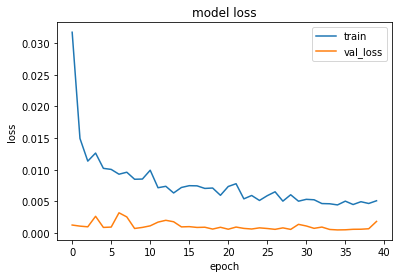

In [32]:
# Courbe loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])

plt.show()

# 💀 Modèle test

Pour prédir le 3 janvier concatener le jeu de train avec le jeu de test pour avoir autant de données dans le test

Refaire les mêmes étapes que pour le train :
* Normaliser
* Transformer en séquence
* Reshape
* Predict : Données normalisées --> Inverse transforme les données

In [33]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([df['Open'],test['Open']],axis=0)

In [34]:
inputs = total_data[len(df)-len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [35]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [36]:
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

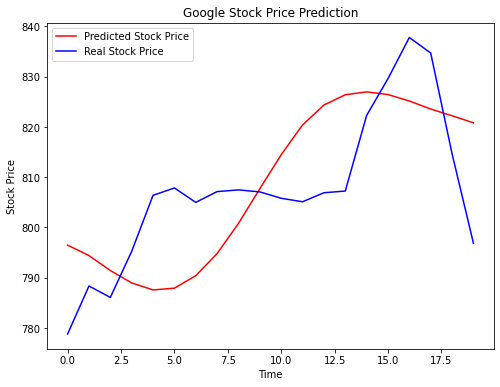

In [40]:
#Visualization
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(predicted,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Suite

1) Enrichir les données
2) Tester d'autres modèles
3) Autres métriques